<a href="https://colab.research.google.com/github/Altaieb-Mohammed/lab_2corse/blob/master/c_lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Линейная регрессия: MSE = 3310211394.71, R² = -0.00


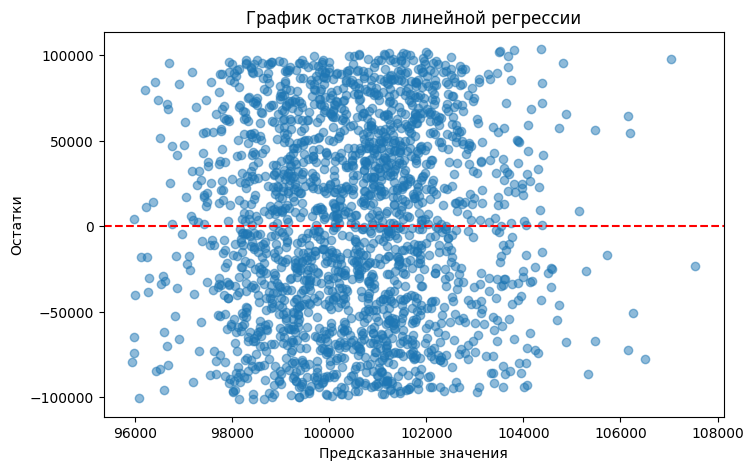

Линейная регрессия (кросс-валидация R²): -0.00 ± 0.00
Гребневая регрессия: MSE = 3310210325.11, R² = -0.00
Lasso: MSE = 3310211047.26, R² = -0.00
ElasticNet: MSE = 3309811842.40, R² = -0.00


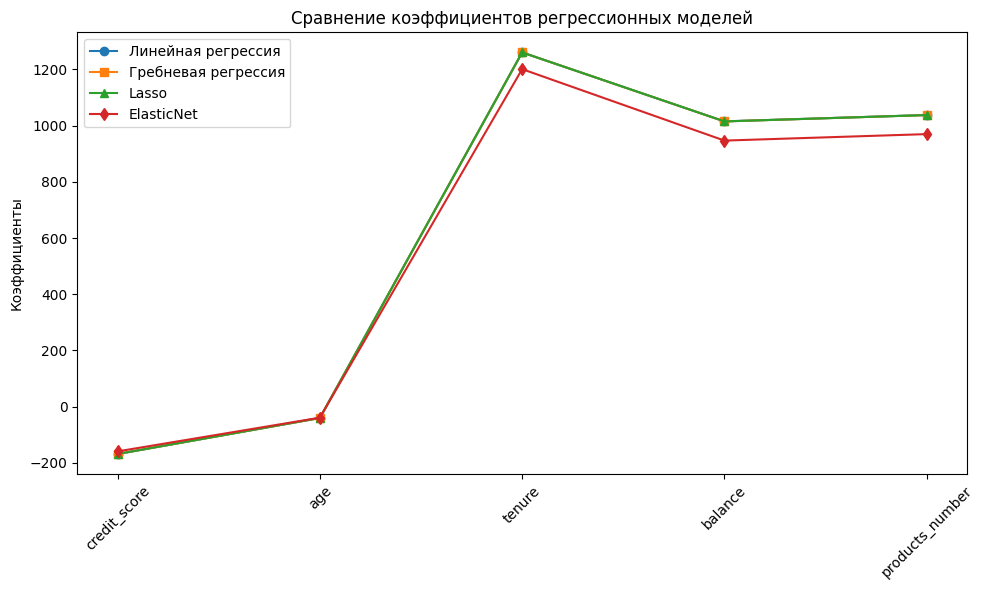

Полиномиальная регрессия (степень 2): MSE = 3325536833.62, R² = -0.01


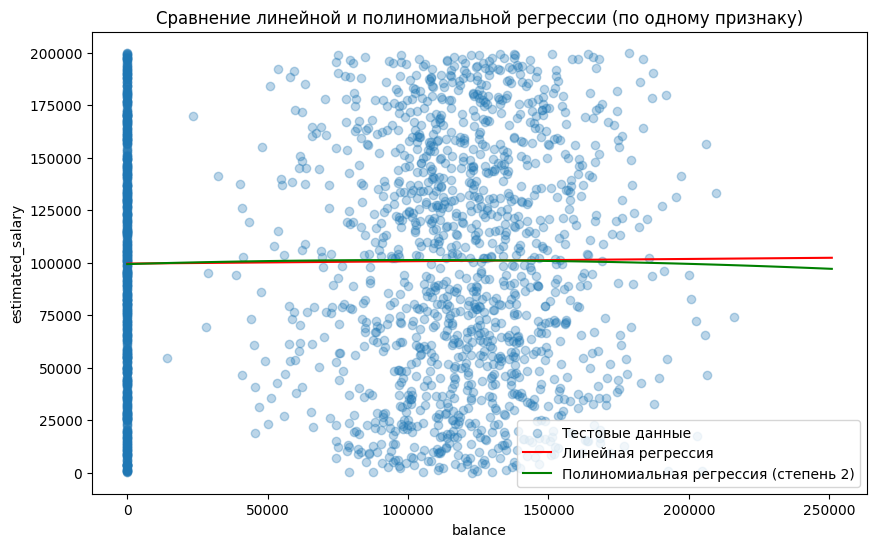

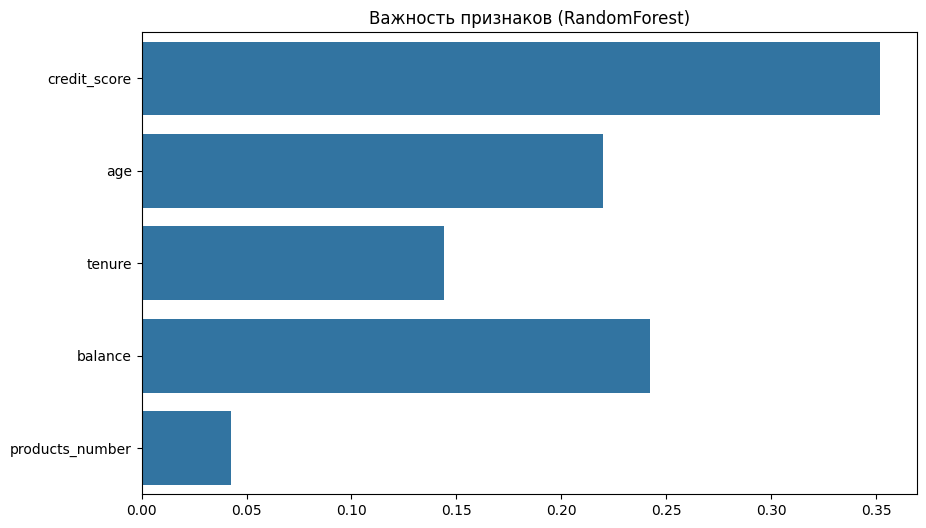


Сравнение моделей:
        Model           MSE        R²
0      Linear  3.310211e+09 -0.002714
1       Ridge  3.310210e+09 -0.002713
2       Lasso  3.310211e+09 -0.002713
3  ElasticNet  3.309812e+09 -0.002593
4  Polynomial  3.325537e+09 -0.007356


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline

# --- 1. Загрузка и подготовка данных ---
url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/bank_customers_cleaned.csv"
df = pd.read_csv(url)

# Проверяем, что целевая переменная не входит в признаки
feature_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number']
X = df[feature_cols]
y = df['estimated_salary']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 2. Линейная регрессия (метод наименьших квадратов) ---
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

# --- 3. Оценка качества линейной модели ---
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f"Линейная регрессия: MSE = {mse_lin:.2f}, R² = {r2_lin:.2f}")

# График остатков
plt.figure(figsize=(8,5))
plt.scatter(y_pred_lin, y_pred_lin - y_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков линейной регрессии")
plt.show()

# --- 4. Кросс-валидация для надежной оценки ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(lin_reg, X_train_scaled, y_train, cv=kf, scoring='r2')
print(f"Линейная регрессия (кросс-валидация R²): {scores.mean():.2f} ± {scores.std():.2f}")

# --- 5. Регуляризованные методы ---
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train_scaled, y_train)
y_pred_elastic = elastic.predict(X_test_scaled)

print(f"Гребневая регрессия: MSE = {mean_squared_error(y_test, y_pred_ridge):.2f}, R² = {r2_score(y_test, y_pred_ridge):.2f}")
print(f"Lasso: MSE = {mean_squared_error(y_test, y_pred_lasso):.2f}, R² = {r2_score(y_test, y_pred_lasso):.2f}")
print(f"ElasticNet: MSE = {mean_squared_error(y_test, y_pred_elastic):.2f}, R² = {r2_score(y_test, y_pred_elastic):.2f}")

# --- 6. Сравнение коэффициентов моделей ---
plt.figure(figsize=(10,6))
plt.plot(lin_reg.coef_, 'o-', label='Линейная регрессия')
plt.plot(ridge.coef_, 's-', label='Гребневая регрессия')
plt.plot(lasso.coef_, '^-', label='Lasso')
plt.plot(elastic.coef_, 'd-', label='ElasticNet')
plt.xticks(ticks=range(len(feature_cols)), labels=feature_cols, rotation=45)
plt.ylabel("Коэффициенты")
plt.title("Сравнение коэффициентов регрессионных моделей")
plt.legend()
plt.tight_layout()
plt.show()

# --- 7. Полиномиальная регрессия с несколькими признаками ---
poly_degree = 2
poly = PolynomialFeatures(degree=poly_degree, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Масштабируем полиномиальные признаки
poly_scaler = StandardScaler()
X_train_poly_scaled = poly_scaler.fit_transform(X_train_poly)
X_test_poly_scaled = poly_scaler.transform(X_test_poly)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly_scaled, y_train)
y_pred_poly = poly_reg.predict(X_test_poly_scaled)

print(f"Полиномиальная регрессия (степень {poly_degree}): MSE = {mean_squared_error(y_test, y_pred_poly):.2f}, R² = {r2_score(y_test, y_pred_poly):.2f}")

# --- 8. Сравнение линейной и полиномиальной регрессии (для наглядности по одному признаку) ---
X_single = df[['balance']].values
y_single = df['estimated_salary'].values

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_single, y_single, test_size=0.2, random_state=42)

poly_single = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_train_poly_s = poly_single.fit_transform(X_train_s)
X_test_poly_s = poly_single.transform(X_test_s)

poly_reg_single = LinearRegression()
poly_reg_single.fit(X_train_poly_s, y_train_s)

X_grid = np.linspace(X_single.min(), X_single.max(), 100).reshape(-1,1)
X_grid_poly = poly_single.transform(X_grid)
y_grid_lin = LinearRegression().fit(X_train_s, y_train_s).predict(X_grid)
y_grid_poly = poly_reg_single.predict(X_grid_poly)

plt.figure(figsize=(10,6))
plt.scatter(X_test_s, y_test_s, alpha=0.3, label='Тестовые данные')
plt.plot(X_grid, y_grid_lin, 'r-', label='Линейная регрессия')
plt.plot(X_grid, y_grid_poly, 'g-', label=f'Полиномиальная регрессия (степень {poly_degree})')
plt.xlabel('balance')
plt.ylabel('estimated_salary')
plt.title('Сравнение линейной и полиномиальной регрессии (по одному признаку)')
plt.legend()
plt.show()

# --- 9. Анализ важности признаков ---
# Для примера используем RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

plt.figure(figsize=(10,6))
sns.barplot(x=rf.feature_importances_, y=feature_cols)
plt.title('Важность признаков (RandomForest)')
plt.show()

# --- 10. Сравнение моделей в таблице ---
models = {
    'Linear': y_pred_lin,
    'Ridge': y_pred_ridge,
    'Lasso': y_pred_lasso,
    'ElasticNet': y_pred_elastic,
    'Polynomial': y_pred_poly
}

results = []
for name, y_pred in models.items():
    results.append({
        'Model': name,
        'MSE': mean_squared_error(y_test, y_pred),
        'R²': r2_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print("\nСравнение моделей:")
print(results_df)
